## Assignment 2.1
## Hyperparameters search
When creating a machine learning model, we can choose among many design choices and explore a range of possibilities without knowing which model architecture can provide the best optimal solution. We can even ask the machine to perform this exploration and select the optimal model architecture automatically. Parameters which define the model architecture are referred to as hyperparameters and this process of searching for the ideal model architecture is referred to as hyperparameter tuning.

Unlike model parameters, hyperparameters cannot be directly trained from the data. Unfortunately, there's no way to calculate “which way should I update my hyperparameter to reduce the loss?” (ie. gradients) in order to find the optimal model architecture; thus, we generally resort to experimentation to figure out what works best.

In this assignment, we will use digits datasets of <a href="http://yann.lecun.com/exdb/mnist/">MNIST</a> and apply grid search, random search and evolutionary search from scikit-learn to find the best parameters.

### Exercise 1

1. Import numpy, pandas and matplotlib.pyplot.
2. Import StratifiedKFold, GridSearchCV and RandomizedSearchCV from sklearn.
3. Import EvolutionaryAlgorithmSearchCV.
4. Import SVC, from sklearn.
5. Import datasets from sklearn 

In [2]:
# YOUR CODE HERE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn imports
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn import datasets

from evolutionary_search import EvolutionaryAlgorithmSearchCV

In [ ]:
#### INTENTIONALLY LEFT BLANK####

### Exercise 2

Load the digits dataset from sklearn datasets

<Figure size 432x288 with 0 Axes>

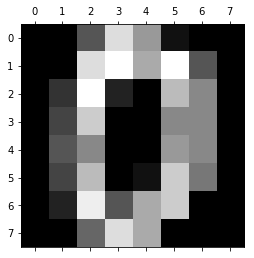

In [3]:
digits = None
# YOUR CODE HERE
digits = datasets.load_digits()
digits.data.shape
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show()

In [ ]:
#### INTENTIONALLY LEFT BLANK####

The MNIST database consists of handwritten digits from 0-9, and incorporates a training set of 60,000 examples and a test set of 10,000 examples.

<br>Check the contents of the digits datasets with the notebook.

In [4]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Now, let's observe the targets.

In [5]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Exercise 3

Set data of the digits to matrix X and the target values to vector y

In [6]:
X = digits.data
y = digits.target
# YOUR CODE HERE
y.shape

(1797,)

In [ ]:
#### INTENTIONALLY LEFT BLANK####

### Grid Search

Grid-search determines the optimal parameters for a model while scanning the data. It can be useful for finding the best parameters of many kinds of machine learning model. However, as search builds and stores a model for each parameter combination, it can be computationally expensive.

We will be searching the best parameters in the following param_grid while implementing grid search and randomized search.

### Exercise 4

Use grid search to find the best parameters using scikit-learn:
1. Set estimator to SVC and param_grid to the parameters given as param_grid. 
2. Use StratifiedKFold cross validation with n_splits = 2. 
3. Use "accuracy" as the scoring metric.
4. Set refit to True.

[What is StratifiedKFold ?](https://stats.stackexchange.com/questions/49540/understanding-stratified-cross-validation)

In [14]:
param_grid = { "C":np.logspace(-7,7, num=5, base=10),"gamma":np.logspace(-7, 7, num=5, base=10)}
cv = None
# YOUR CODE HERE
cv = GridSearchCV(SVC(), param_grid=param_grid, cv=StratifiedKFold(n_splits=2), scoring='accuracy', refit=True, return_train_score=True)
cv.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-07, 3.16228e-04, 1.00000e+00, 3.16228e+03, 1.00000e+07]), 'gamma': array([1.00000e-07, 3.16228e-04, 1.00000e+00, 3.16228e+03, 1.00000e+07])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [ ]:
#### INTENTIONALLY LEFT BLANK####

### Exercise 5

Find the mean cross-validated score of the best_estimator using best_score_ on our model.

In [9]:
best_score = None
# YOUR CODE HERE
best_score = cv.best_score_
print(best_score)

0.9588202559821926


In [ ]:
#### INTENTIONALLY LEFT BLANK####

Now, you can also check the best parameters selected by our grid search model.

In [15]:
cv.best_params_

{'C': 3162.2776601683795, 'gamma': 0.00031622776601683794}


### Exercise 6

Store the five highest mean test score from our model in results using pandas dataframe.
<br>Hint: store the results in the data frame and sort it

In [20]:
results = None
# YOUR CODE HERE
training_results = cv.cv_results_
df = pd.DataFrame.from_dict(training_results)
results = df.sort_values(by='mean_test_score', ascending=False)[:5]
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
21,0.044074,0.000562,0.045874,0.000709,1e+07,0.000316228,"{'C': 10000000.0, 'gamma': 0.00031622776601683...",0.953385,0.964286,0.958820,0.005450,1,1.000000,1.000000,1.000000,0.000000
16,0.044653,0.000141,0.045634,0.001160,3162.28,0.000316228,"{'C': 3162.2776601683795, 'gamma': 0.000316227...",0.953385,0.964286,0.958820,0.005450,1,1.000000,1.000000,1.000000,0.000000
11,0.055591,0.001772,0.057252,0.001089,1,0.000316228,"{'C': 1.0, 'gamma': 0.00031622776601683794}",0.950055,0.958705,0.954368,0.004325,3,0.988839,0.994451,0.991645,0.002806
15,0.043022,0.001515,0.049475,0.000496,3162.28,1e-07,"{'C': 3162.2776601683795, 'gamma': 1e-07}",0.935627,0.944196,0.939900,0.004285,4,0.985491,0.992231,0.988861,0.003370
20,0.036935,0.001801,0.036779,0.001267,1e+07,1e-07,"{'C': 10000000.0, 'gamma': 1e-07}",0.932297,0.946429,0.939343,0.007066,5,1.000000,1.000000,1.000000,0.000000


In [ ]:
#### INTENTIONALLY LEFT BLANK####

### Exercise 7

Convert the results dataframe to pickle and save it to results.pkl

In [21]:
results_in_pickle = None #Convert dataframe to pickle
# YOUR CODE HERE
import pickle
save_to_pickle = results.to_pickle('results.pkl')

In [ ]:
#### INTENTIONALLY LEFT BLANK####

### Random search

Random search finds the optimal number of parameters as grid search. However, random search tries only a fixed number of random parameter settings. The numbers of parameters to be tried out can be specified in n_iter.

### Exercise 8

Use random search to find the best parameters using scikit-learn:
1. Set estimator to SVC and param_distribution to the parameters given above. 
2. Use StratifiedKFold cross validation with n_splits = 2. 
3. Use "accuracy" as the scoring metric.
4. Set refit to True.
5. Set number of iterations to 10 and random_state to 0.

In [22]:
cv = None

# YOUR CODE HERE
cv = RandomizedSearchCV(SVC(), param_distributions=param_grid, n_iter= 10, random_state=0, scoring='accuracy',refit= True, cv=StratifiedKFold(n_splits=2, random_state=0))
cv.fit(X, y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=2, random_state=0, shuffle=False),
          error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'C': array([1.00000e-07, 3.16228e-04, 1.00000e+00, 3.16228e+03, 1.00000e+07]), 'gamma': array([1.00000e-07, 3.16228e-04, 1.00000e+00, 3.16228e+03, 1.00000e+07])},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [ ]:
#### INTENTIONALLY LEFT BLANK####

Now, let's observe the best score and best parameters choosen by our model.

In [23]:
cv.best_score_, cv.best_params_

(0.9588202559821926,
 {'C': 3162.2776601683795, 'gamma': 0.00031622776601683794})

### Genetic Algorithm

<b>Genetic Algorithm</b> is one of the most powerful optimization algorithms based on natural selection and is inspired by Darwin's theory of evolution.

<br>The basic components common to most genetic algorithms are:
<br>• fitness function for optimization
<br>• population of chromosomes
<br>• selection of the chromosomes for reproduction
<br>• crossover and produce next generation of chromosomes
<br>• a random mutation of chromosomes in new generation

Scikit-learn provides sklearn-deap to use evolutionary algorithms. The evolutionary algorithms exponentially reduces the time entailed to find the best parameters by evolving over only the combinations that give the best results instead of trying out every possible combinations.

Now, let's use evolutionary search to find the best parameters.

### Exercise 9

Use evolutionary search algorithm to find the best parameters using scikit-learn:
1. Set estimator to SVC and param_distribution to the parameters given above. 
2. Use StratifiedKFold cross validation with n_splits = 2. 
3. Use "accuracy" as the scoring metric.
4. Set population_size to 10, gene_mutation_prob to 0.10 and tournament_size to 3.
5. Set generations_number to 10.

In [24]:
cv = None

# YOUR CODE HERE
cv = EvolutionaryAlgorithmSearchCV(SVC(), params= param_grid, scoring= 'accuracy', cv= StratifiedKFold(n_splits=2),
                                   population_size=10, gene_mutation_prob=0.10,
                                   tournament_size=3, generations_number =10)
%time cv.fit(X, y)

CPU times: user 5.51 s, sys: 0 ns, total: 5.51 s
Wall time: 5.52 s


In [ ]:
#### INTENTIONALLY LEFT BLANK####

### Exercise 10

Find the best score and best parameters choosen by evolutionary search algorithm.

In [25]:
best_score = None
best_params = None

# YOUR CODE HERE
best_score = cv.best_score_
best_params = cv.best_params_

print(best_score)
print(best_params)

0.9588202559821926
{'C': 3162.2776601683795, 'gamma': 0.00031622776601683794}


In [ ]:
#### INTENTIONALLY LEFT BLANK####

You might have observe the increase in speed while using evolutionary search over grid search and random search. This is why evolutionary search are more popular these days.

Congratulations, you have implemented grid search, random search and evolutionary search on the mnist digits dataset.